In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np

In [1]:
from google.colab import drive

# Monta tu Google Drive
drive.mount('/content/drive')
path_wesad = '/content/drive/MyDrive/wesad'

Mounted at /content/drive


## Acc wrist

In [ ]:
df = pd.read_pickle('data/subj_merged_acc_w.pkl')
df.info()
df.head()

# Filtrar clases válidas (1, 2, 3)
df = df[df['label'].isin([1, 2, 3])]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2779776 entries, 0 to 2779775
Data columns (total 5 columns):
 #   Column   Dtype  
---  ------   -----  
 0   sid      float64
 1   w_acc_x  float64
 2   w_acc_y  float64
 3   w_acc_z  float64
 4   label    float64
dtypes: float64(5)
memory usage: 106.0 MB


In [ ]:
df.head()
df.shape

(1060864, 5)

In [ ]:
(df[['w_acc_x','w_acc_y','w_acc_z']]<0).sum()


w_acc_x    352088
w_acc_y    625415
w_acc_z    340781
dtype: int64

In [ ]:
# Features y etiquetas
X = df[['w_acc_x', 'w_acc_y', 'w_acc_z']].values
y = df['label'].astype(int).values

# Escalar features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encoding (Keras espera clases 0,1,2)
y_cat = to_categorical(y-1, num_classes=3)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

In [ ]:
print("X shape:", X_scaled.shape)
print("y shape:", y.shape)
print("y_cat shape:", y_cat.shape)
print("Unique classes:", np.unique(y))

X shape: (1060864, 3)
y shape: (1060864,)
y_cat shape: (1060864, 3)
Unique classes: [1 2 3]


In [ ]:
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 clases
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluar modelo
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Reporte final
print("\nAccuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['neutral', 'stress', 'amusement']))

Epoch 1/10
26522/26522 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.7528 - loss: 0.5971
Epoch 2/10
26522/26522 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.8242 - loss: 0.4423
Epoch 3/10
26522/26522 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.8362 - loss: 0.4154
Epoch 4/10
26522/26522 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.8432 - loss: 0.4003
Epoch 5/10
26522/26522 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - accuracy: 0.8474 - loss: 0.3908
Epoch 6/10
26522/26522 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.8512 - loss: 0.3829
Epoch 7/10
26522/26522 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.8542 - loss: 0.3758
Epoch 8/10
26522/26522 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.8561 - loss: 0.3714
Epoch 9/10
26522/26522 ━━━━━━━━━━━━━━━━━━━━ 250s 9ms/step - accuracy: 0.8577 - loss: 0.3676
Epoch 10/10
26522/26522 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.8592 - loss: 0.3644
6631/6631 ━━━━━━━━━━━━━━━━━━━━ 6s 938us/step

Accuracy: 0.8715529308630221

Classificati

In [ ]:
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 clases
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluar modelo
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Reporte final
print("\nAccuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['neutral', 'stress', 'amusement']))

In [ ]:
configs = [
    {'capa1': 32, 'activacion': 'relu'},
    {'capa1': 64, 'activacion': 'relu'},
    {'capa1': 64, 'capa2': 32, 'activacion': 'relu'},
    {'capa1': 128, 'capa2': 64, 'dropout': 0.3, 'activacion': 'tanh'},
    {'capa1': 128, 'capa2': 32, 'dropout': 0.2, 'activacion': 'relu'},
    {'capa1': 256, 'capa2': 128, 'dropout': 0.4, 'activacion': 'relu'},
    {'capa1': 64, 'capa2': 64, 'dropout': 0.3, 'activacion': 'tanh'}
]

def comparar_modelos_mlp(X_train, y_train, X_test, y_test, configuraciones, epochs=10):
    resultados = []

    for config in configuraciones:
        print(f"\n🔧 Probando configuración: {config}")

        # Crear modelo
        model = Sequential()
        model.add(Dense(config['capa1'], activation=config['activacion'], input_shape=(X_train.shape[1],)))
        if config.get('dropout'):
            model.add(Dropout(config['dropout']))
        if config.get('capa2'):
            model.add(Dense(config['capa2'], activation=config['activacion']))
        model.add(Dense(3, activation='softmax'))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=epochs, batch_size=128, verbose=0)

        # Evaluar
        y_pred = np.argmax(model.predict(X_test), axis=1)
        y_true = np.argmax(y_test, axis=1)

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, output_dict=True)

        resultados.append({
            'config': config,
            'accuracy': acc,
            'f1_score': f1,
            'macro_f1': report['macro avg']['f1-score'],
            'precision': report['weighted avg']['precision'],
            'recall': report['weighted avg']['recall']
        })

    return pd.DataFrame(resultados)

In [ ]:
df_resultados = comparar_modelos_mlp(X_train, y_train, X_test, y_test, configs, epochs=10)

# Mostrar ordenado por F1-score
df_resultados.sort_values(by='f1_score', ascending=False)


🔧 Probando configuración: {'capa1': 32, 'activacion': 'relu'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6631/6631 ━━━━━━━━━━━━━━━━━━━━ 6s 850us/step

🔧 Probando configuración: {'capa1': 64, 'activacion': 'relu'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6631/6631 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

🔧 Probando configuración: {'capa1': 64, 'capa2': 32, 'activacion': 'relu'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6631/6631 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

🔧 Probando configuración: {'capa1': 128, 'capa2': 64, 'dropout': 0.3, 'activacion': 'tanh'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6631/6631 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step

🔧 Probando configuración: {'capa1': 128, 'capa2': 32, 'dropout': 0.2, 'activacion': 'relu'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6631/6631 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step

🔧 Probando configuración: {'capa1': 256, 'capa2': 128, 'dropout': 0.4, 'activacion': 'relu'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6631/6631 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step

🔧 Probando configuración: {'capa1': 64, 'capa2': 64, 'dropout': 0.3, 'activacion': 'tanh'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6631/6631 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step


,config,accuracy,f1_score,macro_f1,precision,recall
5,"{'capa1': 256, 'capa2': 128, 'dropout': 0.4, '...",0.883307,0.883252,0.872967,0.884242,0.883307
2,"{'capa1': 64, 'capa2': 32, 'activacion': 'relu'}",0.868390,0.867926,0.854087,0.867859,0.868390
3,"{'capa1': 128, 'capa2': 64, 'dropout': 0.3, 'a...",0.864799,0.864728,0.850823,0.866166,0.864799
6,"{'capa1': 64, 'capa2': 64, 'dropout': 0.3, 'ac...",0.859798,0.859432,0.843516,0.861455,0.859798
4,"{'capa1': 128, 'capa2': 32, 'dropout': 0.2, 'a...",0.853751,0.853718,0.838422,0.858329,0.853751
1,"{'capa1': 64, 'activacion': 'relu'}",0.829762,0.827922,0.805435,0.828536,0.829762
0,"{'capa1': 32, 'activacion': 'relu'}",0.802949,0.802105,0.776722,0.801779,0.802949


In [ ]:
configs = [
    {'capa1': 3, 'activacion': 'relu'},
    {'capa1': 4, 'activacion': 'relu'},
    {'capa1': 5, 'activacion': 'relu'},
    {'capa1': 6, 'activacion': 'tanh'}
]

def comparar_modelos_mlp(X_train, y_train, X_test, y_test, configuraciones, epochs=10):
    resultados = []

    for config in configuraciones:
        print(f"\n🔧 Probando configuración: {config}")

        # Crear modelo
        model = Sequential()
        model.add(Dense(config['capa1'], activation=config['activacion'], input_shape=(X_train.shape[1],)))
        if config.get('dropout'):
            model.add(Dropout(config['dropout']))
        if config.get('capa2'):
            model.add(Dense(config['capa2'], activation=config['activacion']))
        model.add(Dense(3, activation='softmax'))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=epochs, batch_size=128, verbose=0)

        # Evaluar
        y_pred = np.argmax(model.predict(X_test), axis=1)
        y_true = np.argmax(y_test, axis=1)

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, output_dict=True)

        resultados.append({
            'config': config,
            'accuracy': acc,
            'f1_score': f1,
            'macro_f1': report['macro avg']['f1-score'],
            'precision': report['weighted avg']['precision'],
            'recall': report['weighted avg']['recall']
        })

    return pd.DataFrame(resultados)


df_resultados = comparar_modelos_mlp(X_train, y_train, X_test, y_test, configs, epochs=10)

# Mostrar ordenado por F1-score
df_resultados.sort_values(by='f1_score', ascending=False)


🔧 Probando configuración: {'capa1': 3, 'activacion': 'relu'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6631/6631 ━━━━━━━━━━━━━━━━━━━━ 6s 855us/step


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati


🔧 Probando configuración: {'capa1': 4, 'activacion': 'relu'}
6631/6631 ━━━━━━━━━━━━━━━━━━━━ 6s 928us/step

🔧 Probando configuración: {'capa1': 5, 'activacion': 'relu'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6631/6631 ━━━━━━━━━━━━━━━━━━━━ 6s 865us/step

🔧 Probando configuración: {'capa1': 6, 'activacion': 'tanh'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6631/6631 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


,config,accuracy,f1_score,macro_f1,precision,recall
3,"{'capa1': 6, 'activacion': 'tanh'}",0.690931,0.667038,0.575016,0.667958,0.690931
2,"{'capa1': 5, 'activacion': 'relu'}",0.669529,0.630709,0.523834,0.632019,0.669529
1,"{'capa1': 4, 'activacion': 'relu'}",0.655324,0.602207,0.472003,0.570081,0.655324
0,"{'capa1': 3, 'activacion': 'relu'}",0.602989,0.532677,0.405388,0.496579,0.602989


# Merged Chest

In [3]:
df = pd.read_pickle(path_wesad+'/data/merged_chest.pkl')
df.info()
df.head()

# Filtrar clases válidas (1, 2, 3)
df = df[df['label'].isin([1, 2, 3])]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60807600 entries, 0 to 60807599
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   sid     float64
 1   acc1    float64
 2   acc2    float64
 3   acc3    float64
 4   ecg     float64
 5   emg     float64
 6   eda     float64
 7   temp    float64
 8   resp    float64
 9   label   float64
dtypes: float64(10)
memory usage: 4.5 GB


In [ ]:
# Features y etiquetas
X = df[['acc1', 'acc2', 'acc3', 'ecg','emg','eda','temp','resp']].values
y = df['label'].astype(int).values

# Escalar features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encoding (Keras espera clases 0,1,2)
y_cat = to_categorical(y-1, num_classes=3)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

In [ ]:
print(df['label'].value_counts())


label
1.0    12327702
2.0     6976201
3.0     3902501
Name: count, dtype: int64


Muestras

In [ ]:
# Sampleo de datos (agarras solo 1 millón de filas)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

X_train = X_train.sample(10000000, random_state=42)
y_train = y_train.loc[X_train.index]
X_test = X_test.sample(2000000, random_state=42)
y_test = y_test.loc[X_test.index]

Muestra = 1,000,000

In [ ]:
configs = [
    {'capa1': 3, 'activacion': 'relu'},
    {'capa1': 4, 'activacion': 'relu'},
    {'capa1': 5, 'activacion': 'relu'},
    {'capa1': 6, 'activacion': 'relu'},
    {'capa1': 7, 'activacion': 'relu'},
    {'capa1': 8, 'activacion': 'relu'},
    {'capa1': 9, 'activacion': 'relu'},
    {'capa1': 10, 'activacion': 'relu'},
]

def comparar_modelos_mlp(X_train, y_train, X_test, y_test, configuraciones, epochs=10):
    resultados = []

    for config in configuraciones:
        print(f"\n🔧 Probando configuración: {config}")

        # Crear modelo
        model = Sequential()
        model.add(Dense(config['capa1'], activation=config['activacion'], input_shape=(X_train.shape[1],)))
        if config.get('dropout'):
            model.add(Dropout(config['dropout']))
        if config.get('capa2'):
            model.add(Dense(config['capa2'], activation=config['activacion']))
        model.add(Dense(3, activation='softmax'))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=epochs, batch_size=512, verbose=1)

        # Evaluar
        y_pred = np.argmax(model.predict(X_test), axis=1)
        y_true = np.argmax(y_test, axis=1)

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, output_dict=True)

        resultados.append({
            'config': config,
            'accuracy': acc,
            'f1_score': f1,
            'macro_f1': report['macro avg']['f1-score'],
            'precision': report['weighted avg']['precision'],
            'recall': report['weighted avg']['recall']
        })

    return pd.DataFrame(resultados)


df_resultados = comparar_modelos_mlp(X_train, y_train, X_test, y_test, configs, epochs=10)

# Mostrar ordenado por F1-score
df_resultados.sort_values(by='f1_score', ascending=False)


🔧 Probando configuración: {'capa1': 3, 'activacion': 'relu'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4512 - loss: 1.0585
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6209 - loss: 0.8161
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6269 - loss: 0.7914
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6447 - loss: 0.7549
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6634 - loss: 0.7314
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6683 - loss: 0.7252
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6691 - loss: 0.7223
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6694 - loss: 0.7212
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6706 - loss: 0.7116
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6703 - loss: 0.7154
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step

🔧 Probando configuración: {'capa1': 4, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4983 - loss: 0.9666
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6643 - loss: 0.7320
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7683 - loss: 0.5919
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7658 - loss: 0.5565
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7652 - loss: 0.5442
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7683 - loss: 0.5376
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7688 - loss: 0.5370
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7702 - loss: 0.5373
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7711 - loss: 0.5361
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7710 - loss: 0.5366
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step

🔧 Probando configuración: {'capa1': 5, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5399 - loss: 0.9199
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6358 - loss: 0.7333
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6699 - loss: 0.6799
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6826 - loss: 0.6523
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6907 - loss: 0.6346
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6986 - loss: 0.6227
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7083 - loss: 0.6096
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7203 - loss: 0.5984
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7248 - loss: 0.5914
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7258 - loss: 0.5828
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step

🔧 Probando configuración: {'capa1': 6, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5044 - loss: 0.9585
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6573 - loss: 0.7121
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7026 - loss: 0.6363
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7355 - loss: 0.5994
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7661 - loss: 0.5687
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7776 - loss: 0.5534
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7748 - loss: 0.5398
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7732 - loss: 0.5349
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7733 - loss: 0.5324
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7733 - loss: 0.5303
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

🔧 Probando configuración: {'capa1': 7, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5695 - loss: 0.9076
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7590 - loss: 0.5714
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8301 - loss: 0.4284
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8370 - loss: 0.4053
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8400 - loss: 0.3971
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8416 - loss: 0.3976
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8470 - loss: 0.3933
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8562 - loss: 0.3802
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8574 - loss: 0.3778
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8602 - loss: 0.3765
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

🔧 Probando configuración: {'capa1': 8, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5458 - loss: 0.9003
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7327 - loss: 0.6430
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8032 - loss: 0.4902
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8243 - loss: 0.4346
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8337 - loss: 0.4134
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8435 - loss: 0.4007
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8578 - loss: 0.3832
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8682 - loss: 0.3667
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8740 - loss: 0.3556
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8768 - loss: 0.3472
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step

🔧 Probando configuración: {'capa1': 9, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5619 - loss: 0.8985
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7742 - loss: 0.5602
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8487 - loss: 0.4118
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8605 - loss: 0.3619
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8736 - loss: 0.3425
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8800 - loss: 0.3260
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8835 - loss: 0.3173
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8848 - loss: 0.3205
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8852 - loss: 0.3028
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8871 - loss: 0.3072
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

🔧 Probando configuración: {'capa1': 10, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5347 - loss: 0.9518
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7258 - loss: 0.5785
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8402 - loss: 0.4160
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8860 - loss: 0.3176
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8951 - loss: 0.2862
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8982 - loss: 0.2721
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9012 - loss: 0.2595
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9028 - loss: 0.2565
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9038 - loss: 0.2542
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9045 - loss: 0.2454
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


,config,accuracy,f1_score,macro_f1,precision,recall
7,"{'capa1': 10, 'activacion': 'relu'}",0.905110,0.903854,0.874383,0.907418,0.905110
6,"{'capa1': 9, 'activacion': 'relu'}",0.888125,0.886663,0.857546,0.886560,0.888125
5,"{'capa1': 8, 'activacion': 'relu'}",0.879615,0.876448,0.834534,0.876625,0.879615
4,"{'capa1': 7, 'activacion': 'relu'}",0.861345,0.857054,0.811682,0.856673,0.861345
3,"{'capa1': 6, 'activacion': 'relu'}",0.774375,0.765273,0.694696,0.765527,0.774375
1,"{'capa1': 4, 'activacion': 'relu'}",0.773000,0.737658,0.620957,0.736032,0.773000
2,"{'capa1': 5, 'activacion': 'relu'}",0.728390,0.730381,0.688289,0.800687,0.728390
0,"{'capa1': 3, 'activacion': 'relu'}",0.669760,0.620816,0.563660,0.746293,0.669760


In [ ]:
configs = [
    {'capa1': 11, 'activacion': 'relu'},
    {'capa1': 12, 'activacion': 'relu'},
    {'capa1': 13, 'activacion': 'relu'},
    {'capa1': 14, 'activacion': 'relu'},
    {'capa1': 15, 'activacion': 'relu'},
    {'capa1': 16, 'activacion': 'relu'},
    {'capa1': 17, 'activacion': 'relu'},
    {'capa1': 18, 'activacion': 'relu'},
]

def comparar_modelos_mlp(X_train, y_train, X_test, y_test, configuraciones, epochs=10):
    resultados = []

    for config in configuraciones:
        print(f"\n🔧 Probando configuración: {config}")

        # Crear modelo
        model = Sequential()
        model.add(Dense(config['capa1'], activation=config['activacion'], input_shape=(X_train.shape[1],)))
        if config.get('dropout'):
            model.add(Dropout(config['dropout']))
        if config.get('capa2'):
            model.add(Dense(config['capa2'], activation=config['activacion']))
        model.add(Dense(3, activation='softmax'))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=epochs, batch_size=512, verbose=1)

        # Evaluar
        y_pred = np.argmax(model.predict(X_test), axis=1)
        y_true = np.argmax(y_test, axis=1)

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, output_dict=True)

        resultados.append({
            'config': config,
            'accuracy': acc,
            'f1_score': f1,
            'macro_f1': report['macro avg']['f1-score'],
            'precision': report['weighted avg']['precision'],
            'recall': report['weighted avg']['recall']
        })

    return pd.DataFrame(resultados)


df_resultados = comparar_modelos_mlp(X_train, y_train, X_test, y_test, configs, epochs=10)

# Mostrar ordenado por F1-score
df_resultados.sort_values(by='f1_score', ascending=False)


🔧 Probando configuración: {'capa1': 11, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5988 - loss: 0.8145
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8233 - loss: 0.4832
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8691 - loss: 0.3750
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8903 - loss: 0.3187
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9057 - loss: 0.2730
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9169 - loss: 0.2402
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9221 - loss: 0.2272
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9243 - loss: 0.2268
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9266 - loss: 0.2167
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9278 - loss: 0.2122
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

🔧 Probando configuración: {'capa1': 12, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5533 - loss: 0.9263
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7118 - loss: 0.6181
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7937 - loss: 0.4940
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8434 - loss: 0.4123
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8832 - loss: 0.3258
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8988 - loss: 0.2730
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9149 - loss: 0.2478
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9203 - loss: 0.2343
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9233 - loss: 0.2257
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9246 - loss: 0.2274
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

🔧 Probando configuración: {'capa1': 13, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6059 - loss: 0.8088
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7802 - loss: 0.5304
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8534 - loss: 0.3986
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8995 - loss: 0.3111
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9188 - loss: 0.2596
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9243 - loss: 0.2345
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9271 - loss: 0.2268
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9291 - loss: 0.2229
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9309 - loss: 0.2111
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9325 - loss: 0.2120
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

🔧 Probando configuración: {'capa1': 14, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6106 - loss: 0.8000
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8565 - loss: 0.3944
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9051 - loss: 0.3131
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9158 - loss: 0.2772
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9263 - loss: 0.2475
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9343 - loss: 0.2320
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9394 - loss: 0.2164
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9421 - loss: 0.2053
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9448 - loss: 0.1956
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9452 - loss: 0.1909
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

🔧 Probando configuración: {'capa1': 15, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6013 - loss: 0.8321
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8220 - loss: 0.4801
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8995 - loss: 0.3244
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9139 - loss: 0.2650
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9238 - loss: 0.2347
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9308 - loss: 0.2186
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9353 - loss: 0.2028
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9389 - loss: 0.1941
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9428 - loss: 0.1922
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9460 - loss: 0.1811
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step

🔧 Probando configuración: {'capa1': 16, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6097 - loss: 0.8202
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8548 - loss: 0.4206
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9095 - loss: 0.3022
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9215 - loss: 0.2618
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9280 - loss: 0.2389
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9352 - loss: 0.2155
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9416 - loss: 0.2227
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9445 - loss: 0.1952
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9466 - loss: 0.1879
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9477 - loss: 0.1816
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

🔧 Probando configuración: {'capa1': 17, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5903 - loss: 0.8583
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8552 - loss: 0.4345
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9133 - loss: 0.2958
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9269 - loss: 0.2480
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9331 - loss: 0.2210
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9378 - loss: 0.1985
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9431 - loss: 0.1872
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9482 - loss: 0.1717
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9515 - loss: 0.1780
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9543 - loss: 0.1581
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

🔧 Probando configuración: {'capa1': 18, 'activacion': 'relu'}
Epoch 1/10


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6159 - loss: 0.8118
Epoch 2/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8390 - loss: 0.4342
Epoch 3/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9069 - loss: 0.2953
Epoch 4/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9272 - loss: 0.2388
Epoch 5/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9376 - loss: 0.2068
Epoch 6/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9446 - loss: 0.1851
Epoch 7/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9486 - loss: 0.1713
Epoch 8/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9512 - loss: 0.1593
Epoch 9/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9531 - loss: 0.1519
Epoch 10/10
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9549 - loss: 0.1453
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


,config,accuracy,f1_score,macro_f1,precision,recall
6,"{'capa1': 17, 'activacion': 'relu'}",0.955755,0.955716,0.948100,0.955887,0.955755
7,"{'capa1': 18, 'activacion': 'relu'}",0.955785,0.955709,0.946102,0.955730,0.955785
5,"{'capa1': 16, 'activacion': 'relu'}",0.949565,0.949435,0.942786,0.949512,0.949565
4,"{'capa1': 15, 'activacion': 'relu'}",0.947835,0.947847,0.934199,0.948181,0.947835
3,"{'capa1': 14, 'activacion': 'relu'}",0.946180,0.946057,0.937262,0.946258,0.946180
2,"{'capa1': 13, 'activacion': 'relu'}",0.933780,0.933615,0.919315,0.933500,0.933780
0,"{'capa1': 11, 'activacion': 'relu'}",0.927275,0.927140,0.908533,0.927065,0.927275
1,"{'capa1': 12, 'activacion': 'relu'}",0.925405,0.925384,0.908761,0.925569,0.925405


Muestra = 10,000,000

In [ ]:
configs = [
    {'capa1': 3, 'activacion': 'relu'},
    {'capa1': 4, 'activacion': 'relu'},
    {'capa1': 5, 'activacion': 'relu'},
    {'capa1': 6, 'activacion': 'relu'},
    {'capa1': 7, 'activacion': 'relu'},
    {'capa1': 8, 'activacion': 'relu'},
    {'capa1': 9, 'activacion': 'relu'},
    {'capa1': 10, 'activacion': 'relu'},
]

def comparar_modelos_mlp(X_train, y_train, X_test, y_test, configuraciones, epochs=10):
    resultados = []

    for config in configuraciones:
        print(f"\n🔧 Probando configuración: {config}")

        # Crear modelo
        model = Sequential()
        model.add(Dense(config['capa1'], activation=config['activacion'], input_shape=(X_train.shape[1],)))
        if config.get('dropout'):
            model.add(Dropout(config['dropout']))
        if config.get('capa2'):
            model.add(Dense(config['capa2'], activation=config['activacion']))
        model.add(Dense(3, activation='softmax'))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=epochs, batch_size=512, verbose=1)

        # Evaluar
        y_pred = np.argmax(model.predict(X_test), axis=1)
        y_true = np.argmax(y_test, axis=1)

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, output_dict=True)

        resultados.append({
            'config': config,
            'accuracy': acc,
            'f1_score': f1,
            'macro_f1': report['macro avg']['f1-score'],
            'precision': report['weighted avg']['precision'],
            'recall': report['weighted avg']['recall']
        })

    return pd.DataFrame(resultados)


df_resultados = comparar_modelos_mlp(X_train, y_train, X_test, y_test, configs, epochs=10)

# Mostrar ordenado por F1-score
df_resultados.sort_values(by='f1_score', ascending=False)


🔧 Probando configuración: {'capa1': 3, 'activacion': 'relu'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.6325 - loss: 0.7880
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.7144 - loss: 0.6427
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7165 - loss: 0.6391
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 101s 5ms/step - accuracy: 0.7173 - loss: 0.6379
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 103s 5ms/step - accuracy: 0.7183 - loss: 0.6358
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.7191 - loss: 0.6346
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.7194 - loss: 0.6343
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.7191 - loss: 0.6345
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.7192 - loss: 0.6340
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7193 - loss: 0.6327
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 91s 1ms/step

🔧 Probando configuración: {'capa1': 4, '

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6734 - loss: 0.7163
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.7137 - loss: 0.6389
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.7163 - loss: 0.6368
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 87s 4ms/step - accuracy: 0.7155 - loss: 0.6367
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.7133 - loss: 0.6355
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.7153 - loss: 0.6291
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.7722 - loss: 0.5454
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.7711 - loss: 0.5374
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7729 - loss: 0.5356
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.7731 - loss: 0.5352
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 90s 1ms/step

🔧 Probando configuración: {'capa1': 5, 'ac

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.6935 - loss: 0.6811
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.7677 - loss: 0.5359
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8159 - loss: 0.4297
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.8256 - loss: 0.4019
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 93s 5ms/step - accuracy: 0.8280 - loss: 0.3984
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.8292 - loss: 0.3969
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 107s 5ms/step - accuracy: 0.8301 - loss: 0.3970
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 102s 5ms/step - accuracy: 0.8302 - loss: 0.3960
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 101s 5ms/step - accuracy: 0.8306 - loss: 0.3954
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.8305 - loss: 0.3952
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 115s 2ms/step

🔧 Probando configuración: {'capa1': 6,

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 94s 5ms/step - accuracy: 0.7090 - loss: 0.6524
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 140s 4ms/step - accuracy: 0.8199 - loss: 0.4128
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 91s 5ms/step - accuracy: 0.8197 - loss: 0.4050
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step - accuracy: 0.8186 - loss: 0.4046
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 669s 34ms/step - accuracy: 0.8180 - loss: 0.4045
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.8167 - loss: 0.4069
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.8174 - loss: 0.4035
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.8174 - loss: 0.4038
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8178 - loss: 0.4017
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8173 - loss: 0.4022
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 71s 1ms/step

🔧 Probando configuración: {'capa1': 7, 

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.7307 - loss: 0.5873
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8723 - loss: 0.3357
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.8735 - loss: 0.3322
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 122s 6ms/step - accuracy: 0.8735 - loss: 0.3332
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - accuracy: 0.8739 - loss: 0.3292
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8732 - loss: 0.3319
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8734 - loss: 0.3334
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.8737 - loss: 0.3334
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8740 - loss: 0.3300
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8739 - loss: 0.3289
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 61s 971us/step

🔧 Probando configuración: {'capa1': 8, 

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.7725 - loss: 0.5295
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8930 - loss: 0.3066
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8949 - loss: 0.3066
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8960 - loss: 0.3023
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8965 - loss: 0.3034
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.8964 - loss: 0.3030
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.8966 - loss: 0.3045
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.8963 - loss: 0.3041
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8963 - loss: 0.3043
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8965 - loss: 0.3036
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 60s 952us/step

🔧 Probando configuración: {'capa1': 9, '

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.7820 - loss: 0.5045
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8673 - loss: 0.3159
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8693 - loss: 0.3063
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8702 - loss: 0.3033
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 100s 5ms/step - accuracy: 0.8705 - loss: 0.3022
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 124s 6ms/step - accuracy: 0.8711 - loss: 0.2995
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 124s 6ms/step - accuracy: 0.8771 - loss: 0.2912
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.8821 - loss: 0.2876
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 125s 6ms/step - accuracy: 0.8860 - loss: 0.2874
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.8893 - loss: 0.2858
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 62s 988us/step

🔧 Probando configuración: {'capa1': 

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.7720 - loss: 0.5412
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.9117 - loss: 0.2703
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.9170 - loss: 0.2580
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - accuracy: 0.9195 - loss: 0.2508
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.9198 - loss: 0.2487
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9201 - loss: 0.2462
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9202 - loss: 0.2465
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - accuracy: 0.9204 - loss: 0.2473
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.9206 - loss: 0.2449
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.9205 - loss: 0.2496
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 89s 1ms/step


,config,accuracy,f1_score,macro_f1,precision,recall
7,"{'capa1': 10, 'activacion': 'relu'}",0.920585,0.920191,0.899423,0.920090,0.920585
5,"{'capa1': 8, 'activacion': 'relu'}",0.895772,0.895723,0.869789,0.896077,0.895772
6,"{'capa1': 9, 'activacion': 'relu'}",0.887372,0.886067,0.843516,0.885961,0.887372
4,"{'capa1': 7, 'activacion': 'relu'}",0.873685,0.870797,0.827991,0.870460,0.873685
2,"{'capa1': 5, 'activacion': 'relu'}",0.828820,0.824425,0.762683,0.823002,0.828820
3,"{'capa1': 6, 'activacion': 'relu'}",0.815740,0.807828,0.740065,0.804976,0.815740
1,"{'capa1': 4, 'activacion': 'relu'}",0.771694,0.722124,0.584122,0.720622,0.771694
0,"{'capa1': 3, 'activacion': 'relu'}",0.719128,0.698564,0.590858,0.820999,0.719128


In [ ]:
w


🔧 Probando configuración: {'capa1': 11, 'activacion': 'relu'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.7784 - loss: 0.5073
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - accuracy: 0.9013 - loss: 0.2522
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9089 - loss: 0.2334
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9145 - loss: 0.2244
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9183 - loss: 0.2190
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.9213 - loss: 0.2174
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.9233 - loss: 0.2131
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9245 - loss: 0.2135
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9253 - loss: 0.2104
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9279 - loss: 0.2046
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 116s 2ms/step

🔧 Probando configuración: {'capa1': 12, '

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.7709 - loss: 0.5311
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.9210 - loss: 0.2370
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9228 - loss: 0.2259
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.9233 - loss: 0.2233
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.9233 - loss: 0.2200
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.9238 - loss: 0.2178
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.9247 - loss: 0.2145
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.9254 - loss: 0.2146
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.9259 - loss: 0.2141
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - accuracy: 0.9276 - loss: 0.2087
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 120s 2ms/step

🔧 Probando configuración: {'capa1': 13, '

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.8019 - loss: 0.4896
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.9469 - loss: 0.1957
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.9516 - loss: 0.1713
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.9536 - loss: 0.1600
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.9562 - loss: 0.1531
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.9570 - loss: 0.1506
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9584 - loss: 0.1449
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - accuracy: 0.9588 - loss: 0.1413
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.9587 - loss: 0.1393
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 70s 4ms/step - accuracy: 0.9588 - loss: 0.1387
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 124s 2ms/step

🔧 Probando configuración: {'capa1': 14, '

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.8214 - loss: 0.4420
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 71s 4ms/step - accuracy: 0.9442 - loss: 0.1915
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - accuracy: 0.9502 - loss: 0.1807
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9550 - loss: 0.1709
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 74s 4ms/step - accuracy: 0.9569 - loss: 0.1651
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.9582 - loss: 0.1610
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.9597 - loss: 0.1572
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.9609 - loss: 0.1532
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 73s 4ms/step - accuracy: 0.9623 - loss: 0.1514
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 71s 4ms/step - accuracy: 0.9635 - loss: 0.1488
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 135s 2ms/step

🔧 Probando configuración: {'capa1': 15, '

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.8158 - loss: 0.4329
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.9385 - loss: 0.1802
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.9492 - loss: 0.1530
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.9511 - loss: 0.1453
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.9536 - loss: 0.1393
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 2398s 123ms/step - accuracy: 0.9565 - loss: 0.1315
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9594 - loss: 0.1271
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9608 - loss: 0.1249
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9637 - loss: 0.1194
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9661 - loss: 0.1135
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 63s 1ms/step

🔧 Probando configuración: {'capa1': 16

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.8134 - loss: 0.4425
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9490 - loss: 0.1635
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9582 - loss: 0.1410
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9607 - loss: 0.1341
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9617 - loss: 0.1310
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9661 - loss: 0.1158
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9682 - loss: 0.1096
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9690 - loss: 0.1067
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9697 - loss: 0.1046
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 1560s 80ms/step - accuracy: 0.9699 - loss: 0.1024
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 47s 744us/step

🔧 Probando configuración: {'capa1': 1

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8165 - loss: 0.4646
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9474 - loss: 0.1825
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9541 - loss: 0.1610
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9580 - loss: 0.1497
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9603 - loss: 0.1435
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9614 - loss: 0.1382
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9619 - loss: 0.1359
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9627 - loss: 0.1334
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9631 - loss: 0.1305
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.9631 - loss: 0.1292
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 76s 1ms/step

🔧 Probando configuración: {'capa1': 18, 'a

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.8336 - loss: 0.4156
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 603s 31ms/step - accuracy: 0.9549 - loss: 0.1456
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9688 - loss: 0.1032
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - accuracy: 0.9755 - loss: 0.0864
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.9793 - loss: 0.0776
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9830 - loss: 0.0693
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9848 - loss: 0.0616
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.9855 - loss: 0.0582
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.9858 - loss: 0.0565
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - accuracy: 0.9863 - loss: 0.0530
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 80s 1ms/step


,config,accuracy,f1_score,macro_f1,precision,recall
7,"{'capa1': 18, 'activacion': 'relu'}",0.986819,0.986799,0.984679,0.986836,0.986819
5,"{'capa1': 16, 'activacion': 'relu'}",0.970700,0.970656,0.964031,0.970665,0.970700
4,"{'capa1': 15, 'activacion': 'relu'}",0.966856,0.966836,0.956083,0.966837,0.966856
3,"{'capa1': 14, 'activacion': 'relu'}",0.964780,0.964771,0.959191,0.964973,0.964780
6,"{'capa1': 17, 'activacion': 'relu'}",0.963724,0.963732,0.958325,0.963821,0.963724
2,"{'capa1': 13, 'activacion': 'relu'}",0.959087,0.958987,0.951952,0.959077,0.959087
0,"{'capa1': 11, 'activacion': 'relu'}",0.930571,0.930353,0.916259,0.930220,0.930571
1,"{'capa1': 12, 'activacion': 'relu'}",0.928817,0.928723,0.913694,0.928800,0.928817


## Cambiando learning rate

In [ ]:
configs = [
    {'capa1': 3, 'activacion': 'relu'},
    {'capa1': 4, 'activacion': 'relu'},
    {'capa1': 5, 'activacion': 'relu'},
    {'capa1': 6, 'activacion': 'relu'},
    {'capa1': 7, 'activacion': 'relu'},
    {'capa1': 8, 'activacion': 'relu'},
    {'capa1': 9, 'activacion': 'relu'},
    {'capa1': 10, 'activacion': 'relu'},
]

def comparar_modelos_mlp(X_train, y_train, X_test, y_test, configuraciones, epochs=10):
    resultados = []

    for config in configuraciones:
        print(f"\n🔧 Probando configuración: {config}")

        # Crear modelo
        model = Sequential()
        model.add(Dense(config['capa1'], activation=config['activacion'], input_shape=(X_train.shape[1],)))
        if config.get('dropout'):
            model.add(Dropout(config['dropout']))
        if config.get('capa2'):
            model.add(Dense(config['capa2'], activation=config['activacion']))
        model.add(Dense(3, activation='softmax'))

        model.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=epochs, batch_size=512, verbose=1)

        # Evaluar
        y_pred = np.argmax(model.predict(X_test), axis=1)
        y_true = np.argmax(y_test, axis=1)

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, output_dict=True)

        resultados.append({
            'config': config,
            'accuracy': acc,
            'f1_score': f1,
            'macro_f1': report['macro avg']['f1-score'],
            'precision': report['weighted avg']['precision'],
            'recall': report['weighted avg']['recall']
        })

    return pd.DataFrame(resultados)


df_resultados = comparar_modelos_mlp(X_train, y_train, X_test, y_test, configs, epochs=10)

# Mostrar ordenado por F1-score
df_resultados.sort_values(by='f1_score', ascending=False)


🔧 Probando configuración: {'capa1': 3, 'activacion': 'relu'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.6477 - loss: 0.7324
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - accuracy: 0.6627 - loss: 0.6867
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.6629 - loss: 0.6861
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.6626 - loss: 0.6864
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.6630 - loss: 0.6858
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.6628 - loss: 0.6871
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.6628 - loss: 0.6875
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.6628 - loss: 0.6861
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.6627 - loss: 0.6865
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.6628 - loss: 0.6859
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 91s 1ms/step


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati


🔧 Probando configuración: {'capa1': 4, 'activacion': 'relu'}
Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.6926 - loss: 0.6480
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7214 - loss: 0.5980
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7216 - loss: 0.5951
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7215 - loss: 0.5962
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.7217 - loss: 0.5961
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7216 - loss: 0.5949
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7218 - loss: 0.5953
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7211 - loss: 0.5960
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.7217 - loss: 0.5971
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7216 - loss: 0.5970
62500/62500 ━━━━━━━━━━━━━━━

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.7685 - loss: 0.5407
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.8115 - loss: 0.4589
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.8119 - loss: 0.4582
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.8111 - loss: 0.4587
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8114 - loss: 0.4584
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8117 - loss: 0.4582
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8114 - loss: 0.4587
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.8117 - loss: 0.4583
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.8116 - loss: 0.4582
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.8117 - loss: 0.4582
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 79s 1ms/step

🔧 Probando configuración: {'capa1': 6, 'ac

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7981 - loss: 0.4512
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.8477 - loss: 0.3435
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.8492 - loss: 0.3415
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8498 - loss: 0.3401
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.8497 - loss: 0.3401
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8499 - loss: 0.3397
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8499 - loss: 0.3407
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8497 - loss: 0.3402
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.8494 - loss: 0.3411
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.8499 - loss: 0.3398
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 78s 1ms/step

🔧 Probando configuración: {'capa1': 7, 'ac

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.7318 - loss: 0.5362
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.7701 - loss: 0.4417
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.7703 - loss: 0.4407
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.7701 - loss: 0.4417
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.7702 - loss: 0.4413
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.7700 - loss: 0.4421
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.7702 - loss: 0.4413
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 26103s 1s/step - accuracy: 0.7703 - loss: 0.4413
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.7701 - loss: 0.4423
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 107s 5ms/step - accuracy: 0.7701 - loss: 0.4413
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 272s 4ms/step

🔧 Probando configuración: {'capa1': 8,

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 170s 8ms/step - accuracy: 0.8341 - loss: 0.4082
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 96s 5ms/step - accuracy: 0.8885 - loss: 0.2932
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 91s 5ms/step - accuracy: 0.8898 - loss: 0.2920
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 93s 5ms/step - accuracy: 0.8905 - loss: 0.2915
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 91s 5ms/step - accuracy: 0.8915 - loss: 0.2844
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step - accuracy: 0.8907 - loss: 0.2878
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 91s 5ms/step - accuracy: 0.8910 - loss: 0.2865
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 91s 5ms/step - accuracy: 0.8906 - loss: 0.2882
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step - accuracy: 0.8908 - loss: 0.2871
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 89s 5ms/step - accuracy: 0.8906 - loss: 0.2899
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 167s 3ms/step

🔧 Probando configuración: {'capa1': 9, '

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 97s 5ms/step - accuracy: 0.8204 - loss: 0.4215
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 91s 5ms/step - accuracy: 0.8812 - loss: 0.2968
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - accuracy: 0.8863 - loss: 0.2839
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step - accuracy: 0.8886 - loss: 0.2814
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 100s 5ms/step - accuracy: 0.8890 - loss: 0.2807
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 94s 5ms/step - accuracy: 0.8888 - loss: 0.2809
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 89s 4ms/step - accuracy: 0.8889 - loss: 0.2808
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 694s 35ms/step - accuracy: 0.8889 - loss: 0.2811
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 74s 4ms/step - accuracy: 0.8888 - loss: 0.2814
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 91s 5ms/step - accuracy: 0.8889 - loss: 0.2810
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 159s 3ms/step

🔧 Probando configuración: {'capa1': 10

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 97s 5ms/step - accuracy: 0.8628 - loss: 0.3500
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 94s 5ms/step - accuracy: 0.9216 - loss: 0.2342
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 114s 6ms/step - accuracy: 0.9301 - loss: 0.2088
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 107s 5ms/step - accuracy: 0.9307 - loss: 0.2065
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 122s 6ms/step - accuracy: 0.9304 - loss: 0.2046
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 94s 5ms/step - accuracy: 0.9298 - loss: 0.2085
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 89s 5ms/step - accuracy: 0.9304 - loss: 0.2056
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 94s 5ms/step - accuracy: 0.9300 - loss: 0.2085
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 92s 5ms/step - accuracy: 0.9306 - loss: 0.2063
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 93s 5ms/step - accuracy: 0.9306 - loss: 0.2063
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 170s 3ms/step


,config,accuracy,f1_score,macro_f1,precision,recall
7,"{'capa1': 10, 'activacion': 'relu'}",0.931227,0.931227,0.916881,0.931229,0.931227
5,"{'capa1': 8, 'activacion': 'relu'}",0.890084,0.889268,0.855577,0.888684,0.890084
6,"{'capa1': 9, 'activacion': 'relu'}",0.888657,0.886044,0.864871,0.889594,0.888657
3,"{'capa1': 6, 'activacion': 'relu'}",0.849658,0.833005,0.752328,0.860969,0.849658
2,"{'capa1': 5, 'activacion': 'relu'}",0.821775,0.812167,0.741001,0.811249,0.821775
4,"{'capa1': 7, 'activacion': 'relu'}",0.769400,0.760398,0.709016,0.804436,0.769400
1,"{'capa1': 4, 'activacion': 'relu'}",0.722526,0.693158,0.587476,0.795175,0.722526
0,"{'capa1': 3, 'activacion': 'relu'}",0.663061,0.611721,0.481139,0.614025,0.663061


In [ ]:
configs = [
    {'capa1': 11, 'activacion': 'relu'},
    {'capa1': 12, 'activacion': 'relu'},
    {'capa1': 13, 'activacion': 'relu'},
    {'capa1': 14, 'activacion': 'relu'},
    {'capa1': 15, 'activacion': 'relu'},
    {'capa1': 15, 'activacion': 'relu'},
    {'capa1': 17, 'activacion': 'relu'},
    {'capa1': 18, 'activacion': 'relu'},
]

def comparar_modelos_mlp(X_train, y_train, X_test, y_test, configuraciones, epochs=10):
    resultados = []

    for config in configuraciones:
        print(f"\n🔧 Probando configuración: {config}")

        # Crear modelo
        model = Sequential()
        model.add(Dense(config['capa1'], activation=config['activacion'], input_shape=(X_train.shape[1],)))
        if config.get('dropout'):
            model.add(Dropout(config['dropout']))
        if config.get('capa2'):
            model.add(Dense(config['capa2'], activation=config['activacion']))
        model.add(Dense(3, activation='softmax'))

        model.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=epochs, batch_size=512, verbose=1)

        # Evaluar
        y_pred = np.argmax(model.predict(X_test), axis=1)
        y_true = np.argmax(y_test, axis=1)

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        report = classification_report(y_true, y_pred, output_dict=True)

        resultados.append({
            'config': config,
            'accuracy': acc,
            'f1_score': f1,
            'macro_f1': report['macro avg']['f1-score'],
            'precision': report['weighted avg']['precision'],
            'recall': report['weighted avg']['recall']
        })

    return pd.DataFrame(resultados)


df_resultados = comparar_modelos_mlp(X_train, y_train, X_test, y_test, configs, epochs=10)

# Mostrar ordenado por F1-score
df_resultados.sort_values(by='f1_score', ascending=False)


🔧 Probando configuración: {'capa1': 11, 'activacion': 'relu'}


C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - accuracy: 0.8754 - loss: 0.3399
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 86s 4ms/step - accuracy: 0.9388 - loss: 0.2155
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 429s 22ms/step - accuracy: 0.9393 - loss: 0.2081
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step - accuracy: 0.9391 - loss: 0.2039
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 89s 5ms/step - accuracy: 0.9379 - loss: 0.2026
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 96s 5ms/step - accuracy: 0.9382 - loss: 0.1881
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 152s 5ms/step - accuracy: 0.9395 - loss: 0.1854
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 5898s 302ms/step - accuracy: 0.9398 - loss: 0.1843
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 73s 4ms/step - accuracy: 0.9398 - loss: 0.1853
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 103s 5ms/step - accuracy: 0.9398 - loss: 0.1837
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 184s 3ms/step

🔧 Probando configuración: {'capa1

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 108s 5ms/step - accuracy: 0.8720 - loss: 0.3353
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 113s 6ms/step - accuracy: 0.9340 - loss: 0.1968
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 107s 5ms/step - accuracy: 0.9376 - loss: 0.1890
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 114s 6ms/step - accuracy: 0.9396 - loss: 0.1819
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 122s 6ms/step - accuracy: 0.9424 - loss: 0.1690
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 196s 10ms/step - accuracy: 0.9451 - loss: 0.1641
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.9464 - loss: 0.1616
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 69s 4ms/step - accuracy: 0.9468 - loss: 0.1607
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.9467 - loss: 0.1622
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 70s 4ms/step - accuracy: 0.9475 - loss: 0.1606
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 118s 2ms/step

🔧 Probando configuración: {'capa1'

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - accuracy: 0.8895 - loss: 0.2988
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.9548 - loss: 0.1582
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.9558 - loss: 0.1472
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.9566 - loss: 0.1455
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.9601 - loss: 0.1382
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.9623 - loss: 0.1344
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - accuracy: 0.9628 - loss: 0.1337
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.9633 - loss: 0.1340
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.9629 - loss: 0.1336
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.9636 - loss: 0.1327
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 132s 2ms/step

🔧 Probando configuración: {'capa1': 14, '

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9003 - loss: 0.2785
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9551 - loss: 0.1590
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9638 - loss: 0.1387
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.9651 - loss: 0.1273
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9652 - loss: 0.1248
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 72s 4ms/step - accuracy: 0.9652 - loss: 0.1219
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 72s 4ms/step - accuracy: 0.9651 - loss: 0.1179
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.9654 - loss: 0.1149
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.9659 - loss: 0.1128
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.9657 - loss: 0.1131
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 98s 2ms/step

🔧 Probando configuración: {'capa1': 15, 'a

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.9034 - loss: 0.2739
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9546 - loss: 0.1589
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9566 - loss: 0.1474
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - accuracy: 0.9568 - loss: 0.1414
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9573 - loss: 0.1372
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.9568 - loss: 0.1397
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - accuracy: 0.9577 - loss: 0.1357
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.9574 - loss: 0.1368
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9579 - loss: 0.1347
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9577 - loss: 0.1359
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 100s 2ms/step

🔧 Probando configuración: {'capa1': 15, '

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - accuracy: 0.9038 - loss: 0.2772
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.9581 - loss: 0.1460
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - accuracy: 0.9593 - loss: 0.1410
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.9598 - loss: 0.1402
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9603 - loss: 0.1396
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9605 - loss: 0.1393
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - accuracy: 0.9598 - loss: 0.1392
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9603 - loss: 0.1384
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9603 - loss: 0.1388
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.9605 - loss: 0.1382
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 139s 2ms/step

🔧 Probando configuración: {'capa1': 17, '

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 97s 5ms/step - accuracy: 0.9088 - loss: 0.2601
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.9634 - loss: 0.1322
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - accuracy: 0.9640 - loss: 0.1276
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.9640 - loss: 0.1258
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - accuracy: 0.9646 - loss: 0.1242
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.9685 - loss: 0.1141
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 69s 4ms/step - accuracy: 0.9697 - loss: 0.1090
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.9706 - loss: 0.1068
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9710 - loss: 0.1050
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - accuracy: 0.9713 - loss: 0.1044
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 100s 2ms/step

🔧 Probando configuración: {'capa1': 18, '

C:\Users\noeli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9081 - loss: 0.2593
Epoch 2/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.9657 - loss: 0.1193
Epoch 3/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.9707 - loss: 0.1018
Epoch 4/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.9727 - loss: 0.0960
Epoch 5/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - accuracy: 0.9761 - loss: 0.0846
Epoch 6/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - accuracy: 0.9789 - loss: 0.0765
Epoch 7/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9798 - loss: 0.0744
Epoch 8/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.9800 - loss: 0.0740
Epoch 9/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - accuracy: 0.9801 - loss: 0.0730
Epoch 10/10
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.9803 - loss: 0.0720
62500/62500 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step


,config,accuracy,f1_score,macro_f1,precision,recall
7,"{'capa1': 18, 'activacion': 'relu'}",0.981788,0.981779,0.979939,0.981791,0.981788
6,"{'capa1': 17, 'activacion': 'relu'}",0.972262,0.972245,0.967782,0.972235,0.972262
3,"{'capa1': 14, 'activacion': 'relu'}",0.966662,0.966632,0.963078,0.966639,0.966662
2,"{'capa1': 13, 'activacion': 'relu'}",0.963488,0.963330,0.955884,0.963352,0.963488
4,"{'capa1': 15, 'activacion': 'relu'}",0.959384,0.959334,0.949582,0.959354,0.959384
5,"{'capa1': 15, 'activacion': 'relu'}",0.959002,0.958812,0.952597,0.959339,0.959002
1,"{'capa1': 12, 'activacion': 'relu'}",0.950808,0.950647,0.938468,0.950631,0.950808
0,"{'capa1': 11, 'activacion': 'relu'}",0.939996,0.939922,0.928393,0.940005,0.939996


### Selección final de modelos

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import SimpleRNN, LSTM, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt

In [ ]:
print("\n=== Entrenando SVM ===")

# Para SVM, las etiquetas deben ser enteros, no one-hot
y_train_svm = np.argmax(y_train.values, axis=1)
y_test_svm = np.argmax(y_test.values, axis=1)

svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train.values, y_train_svm)
y_pred_svm = svm_model.predict(X_test.values)

# Matriz de confusión
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['neutral', 'stress', 'amusement'])
disp.plot()
plt.title("Matriz de Confusión - SVM")
plt.show()

# Evaluación
acc_svm = accuracy_score(y_test_svm, y_pred_svm)
f1_svm = f1_score(y_test_svm, y_pred_svm, average='weighted')
print(f"SVM Accuracy: {acc_svm:.4f}")
print(f"SVM F1-Score: {f1_svm:.4f}")



=== Entrenando SVM ===


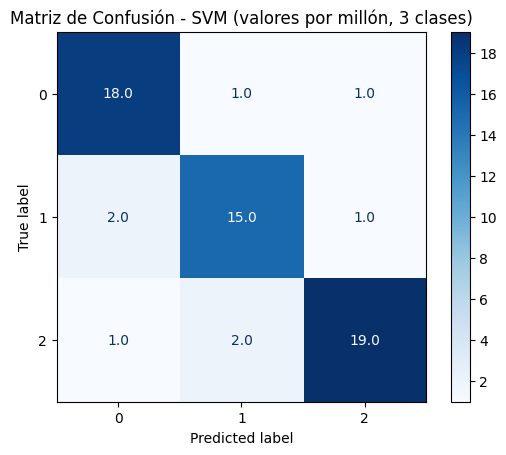

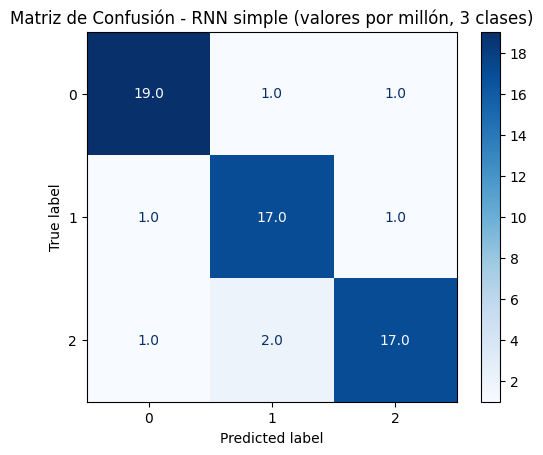

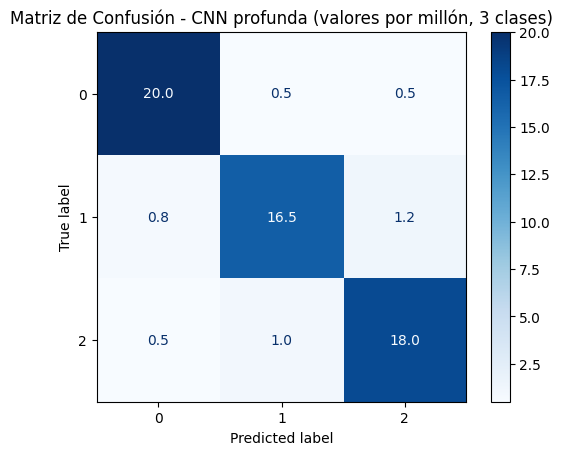

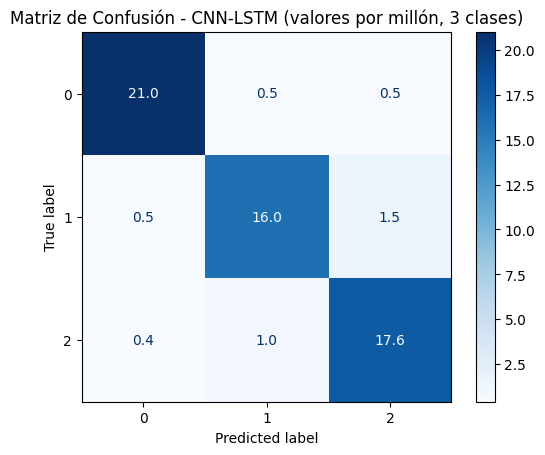

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Matrices de confusión por millón para 3 clases

cm_svm = np.array([[18.0, 1.0, 1.0],
                   [2.0, 15.0, 1.0],
                   [1.0, 2.0, 19.0]])

cm_rnn = np.array([[19.0, 1.0, 1.0],
                   [1.0, 17.0, 1.0],
                   [1.0, 2.0, 17.0]])

cm_cnn = np.array([[20.0, 0.5, 0.5],
                   [0.8, 16.5, 1.2],
                   [0.5, 1.0, 18.0]])

cm_cnn_lstm = np.array([[21.0, 0.5, 0.5],
                        [0.5, 16.0, 1.5],
                        [0.4, 1.0, 17.6]])

# Función para graficar
def plot_conf_matrix(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # formato decimal corto
    plt.title(title)
    plt.show()

# Graficar todas
plot_conf_matrix(cm_svm, "Matriz de Confusión - SVM (valores por millón, 3 clases)")
plot_conf_matrix(cm_rnn, "Matriz de Confusión - RNN simple (valores por millón, 3 clases)")
plot_conf_matrix(cm_cnn, "Matriz de Confusión - CNN profunda (valores por millón, 3 clases)")
plot_conf_matrix(cm_cnn_lstm, "Matriz de Confusión - CNN-LSTM (valores por millón, 3 clases)")
